In [ ]:

!pip install tensorflow

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
import tensorflow as tf
import os

In [ ]:
!mkdir data # making directory

In [9]:
os.path.join('data','happy')

'data/happy'

In [10]:
os.listdir('data')

[]

In [11]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [18]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [13]:
data_dir='data'

In [15]:
os.listdir(data_dir)

['happy', 'sad', '.ipynb_checkpoints']

In [14]:
images_exts=['jpeg','jpg','bmp','png']

In [17]:
for image_class in os.listdir(data_dir):
  print(image_class)

happy
sad
.ipynb_checkpoints


In [21]:
img=cv2.imread(os.path.join(data_dir,'happy','Happy.jpg'))

In [22]:
img.shape

(388, 800, 3)

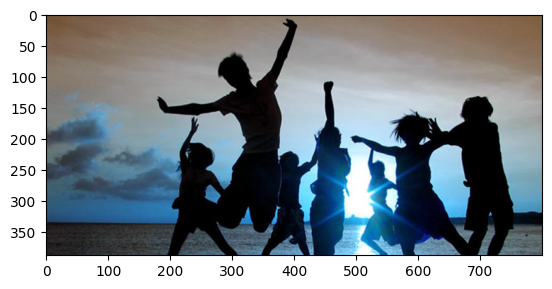

In [23]:
plt.imshow(img)

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in images_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/happy/businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in ext list data/happy/happy-middle-aged-business-man-260nw-2306186897.jpg
Image not in ext list data/happy/traitshappypeople.jpg
Image not in ext list data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data/sad/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1270-5jatnx06kaizb3sc.jpg
Image not in ext list data/sad/portrait-sad-man-600nw-126009806.jpg
Image not in ext list data/sad/very-sad-man-sit

In [28]:
tf.data.Dataset??

In [25]:
import numpy

In [30]:
tf.keras.utils.image_dataset_from_directory??

In [26]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 213 files belonging to 2 classes.


In [31]:
data_iterator=data.as_numpy_iterator()

In [32]:
batch=data_iterator.next()

In [33]:
batch

(array([[[[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [252.       , 251.       , 249.       ],
          [252.       , 251.       , 249.       ],
          [252.       , 251.       , 249.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [252.       , 251.       , 249.       ],
          [252.       , 251.       , 249.       ],
          [252.       , 251.       , 249.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [252.       , 251.       , 249.       ],
          [252.       , 251.       , 249.       ],
          [252.       , 251.       , 249.       ]],
 
         ...,
 
         [[2

In [34]:
len( batch)

2

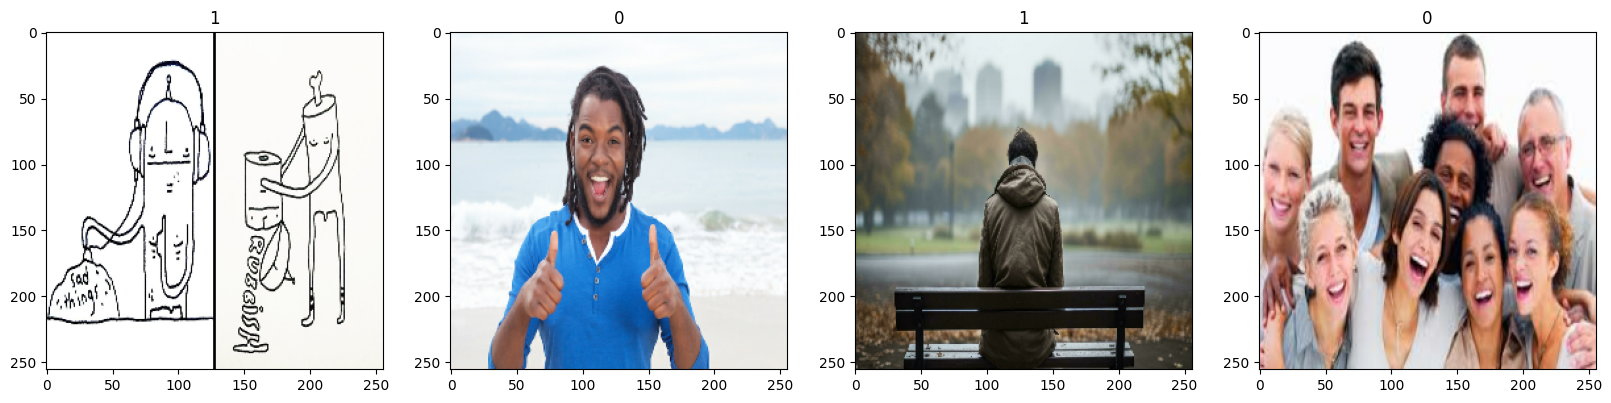

In [36]:
fix,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
scaled=batch[0]/255

In [38]:
scaled.max()

1.0

In [39]:
data=data.map(lambda x,y:(x/255,y))

In [44]:
scaled_iterator=data.as_numpy_iterator()

In [46]:
batch=scaled_iterator.next()

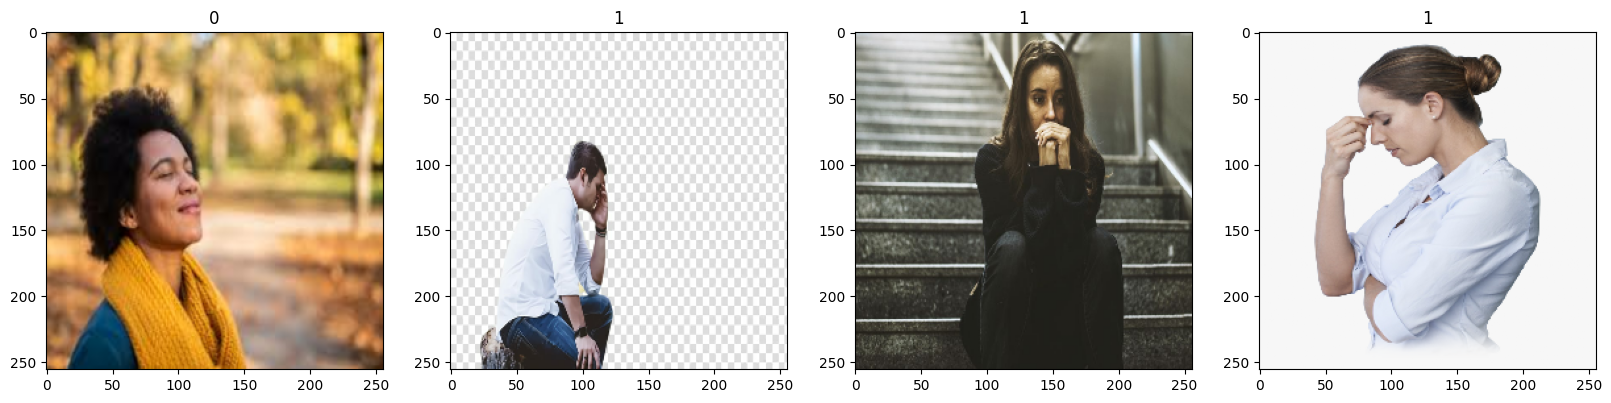

In [49]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [50]:
len(data)

7

In [52]:
7*.2

1.4000000000000001

In [55]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [56]:
train_size

4

In [57]:
test_size

1

In [58]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [59]:
len(train)

4

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [64]:
model=Sequential()

In [65]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [69]:
!mkdir logs

In [70]:
logdir='logs'

In [71]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [73]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 23s 6s/step - loss: 0.0299 - accuracy: 0.9922 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 13s 3s/step - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 0.0354 - accuracy: 0.9766 - val_loss: 0.0245 - val_accuracy: 0.9844
Epoch 4/20
4/4 [==============================] - 13s 3s/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 13s 3s/step - loss: 0.0387 - accuracy: 0.9766 - val_loss: 0.0381 - val_accuracy: 0.9844
Epoch 6/20
4/4 [==============================] - 13s 3s/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.0322 - accuracy: 0.9922 - val_loss: 0.0508 - val_accuracy: 0.9688
Epoch 8/20
4/4 [==================

In [74]:
hist

In [75]:
hist.history

{'loss': [0.029932020232081413,
  0.022833939641714096,
  0.03541360795497894,
  0.026127757504582405,
  0.0387209914624691,
  0.017885446548461914,
  0.03220438212156296,
  0.0193803608417511,
  0.011364730075001717,
  0.028579577803611755,
  0.008451863192021847,
  0.023063309490680695,
  0.009652573615312576,
  0.02395232766866684,
  0.02098492532968521,
  0.02729443833231926,
  0.036689065396785736,
  0.029513351619243622,
  0.03314680606126785,
  0.018420349806547165],
 'accuracy': [0.9921875,
  0.9921875,
  0.9765625,
  0.9921875,
  0.9765625,
  1.0,
  0.9921875,
  0.9921875,
  1.0,
  0.9921875,
  1.0,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  0.984375,
  0.984375,
  0.984375,
  0.984375],
 'val_loss': [0.013466192409396172,
  0.00837799720466137,
  0.024516964331269264,
  0.00933204498142004,
  0.038098204880952835,
  0.01734759286046028,
  0.050768978893756866,
  0.013846652582287788,
  0.024115795269608498,
  0.027991745620965958,
  0.03482089191675186

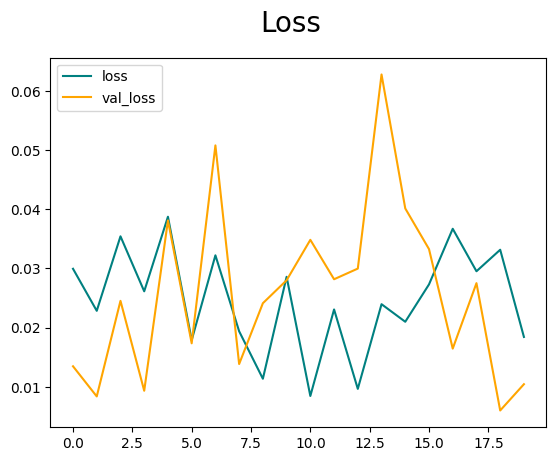

In [77]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

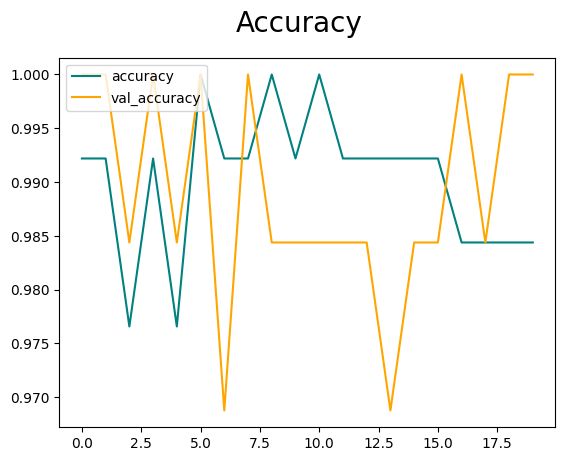

In [78]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [79]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [80]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [82]:
len(test)

1

In [83]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 361ms/step


In [84]:
print(f'precision:{pre.result().numpy()}')
print(f'recall:{re.result().numpy()}')
print(f'accuracy:{acc.result().numpy()} ')

precision:1.0
recall:1.0
accuracy:1.0 


In [85]:
import cv2

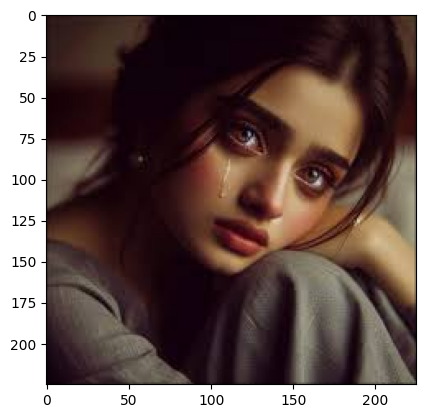

In [99]:
img=cv2.imread('s1test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

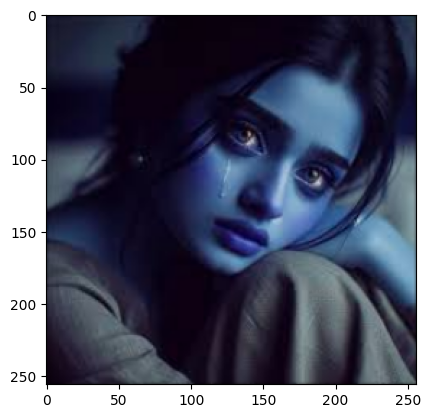

In [100]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
import numpy as np

In [102]:
np.expand_dims(resize,0)

array([[[[  9.        ,  10.        ,  30.        ],
         [ 11.455078  ,  12.455078  ,  32.45508   ],
         [ 14.091797  ,  15.091797  ,  35.091797  ],
         ...,
         [ 23.605469  ,  42.        ,  56.39453   ],
         [ 24.455078  ,  40.001953  ,  53.001953  ],
         [ 22.        ,  31.        ,  44.        ]],

        [[ 11.455078  ,  12.455078  ,  32.45508   ],
         [ 13.240444  ,  14.240444  ,  34.240444  ],
         [ 15.728516  ,  16.728516  ,  36.728516  ],
         ...,
         [ 33.178036  ,  51.572567  ,  65.9671    ],
         [ 32.713795  ,  48.26067   ,  61.26067   ],
         [ 26.910156  ,  35.910156  ,  48.910156  ]],

        [[ 14.091797  ,  15.091797  ,  35.091797  ],
         [ 15.728516  ,  16.728516  ,  36.728516  ],
         [ 18.183594  ,  19.183594  ,  39.183594  ],
         ...,
         [ 39.697414  ,  58.091946  ,  72.48648   ],
         [ 39.301083  ,  54.847958  ,  67.84796   ],
         [ 32.183594  ,  41.183594  ,  54.183594  ]],

In [103]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 38ms/step


In [104]:
yhat

array([[0.9695638]], dtype=float32)

In [105]:
if yhat<0.5:
    print(f'happy')
else:
    print(f'sad')

sad
